# Deep Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Mohamed Belaachir|mobelaachir|Mo Belaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|
|Michal Reszka-Gniecki|Ckires|...|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Visualiseren](#visualiseren)
- [Feature Engineering](#feature-engineering)
    - [Analysis](#analysis)
- [Modeling](#modeling)
    - [Fully-connected neuraal netwerk](#Model1)
    - [Convolutioneel neuraal netwerk from scratch](#Model2)
    - [Transfer learning](#Model3)
    - [Multimodaal mode](#Model4)
- [Results](#results)
    - [Overview](#overview)
    - [Scores](#scores)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import tensorflow as tf
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Data Overview

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_numeriek_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Portfolio 1 Datasets/train.csv')
test_numeriek_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Portfolio 1 Datasets/test.csv')

In [16]:
img_train_directory = "/content/drive/MyDrive/Colab Notebooks/Portfolio 1 Datasets/Train"
img_test_directory = "/content/drive/MyDrive/Colab Notebooks/Portfolio 1 Datasets/Test"

In [27]:
image_paths = tf.io.gfile.glob(img_train_directory + '/*.jpg')
images = []
for path in image_paths:
    image_raw = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image_raw) # Aanpassen naar je bestandstype (bijv. png)
    images.append(image)

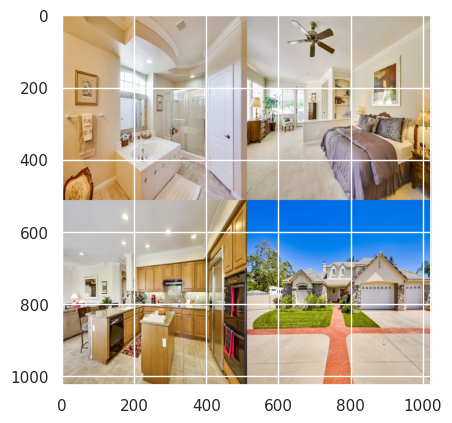

In [30]:
plt.imshow(images[0].numpy()) # Weergeeft de eerste afbeelding
plt.show()

In [17]:
display(train_numeriek_df)
display(test_numeriek_df.head())

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226
...,...,...,...,...,...,...,...
495,496,2,2.0,1257,35.6406,-120.7003,380000
496,497,4,2.0,2072,35.6406,-120.7003,429900
497,498,2,2.0,2213,35.6406,-120.7003,585000
498,499,3,2.5,1500,35.6406,-120.7003,319000


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228


## Exploratory Data Analysis

###Datatype

In [6]:
train_numeriek_df.info()
test_numeriek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   House ID   500 non-null    int64  
 1   Bedrooms   500 non-null    int64  
 2   Bathrooms  500 non-null    float64
 3   Area       500 non-null    int64  
 4   Latitude   500 non-null    float64
 5   Longitude  500 non-null    float64
 6   Price      500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   House ID   35 non-null     int64  
 1   Bedrooms   35 non-null     int64  
 2   Bathrooms  35 non-null     float64
 3   Area       35 non-null     int64  
 4   Latitude   35 non-null     float64
 5   Longitude  35 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.8 KB


### Kolombeschrijving

**House ID**: Unieke ID voor elk huis (int)  
**Bedrooms**: Het aantal slaapkamers in een huis (int)  
**Bathrooms**: Het aantal badkamers in een huis. Een halve badkamer betekent dan alleen 1 toilet of doucheruimte of wasbak. (float)  
**Area**: Het totale oppervlakte van het huis  
**Latitude**: Coordinaten (float)    
**Latitude**: Coordinaten (float)  
**Price**: De prijs van het huis (int)

### Verdeling van de data

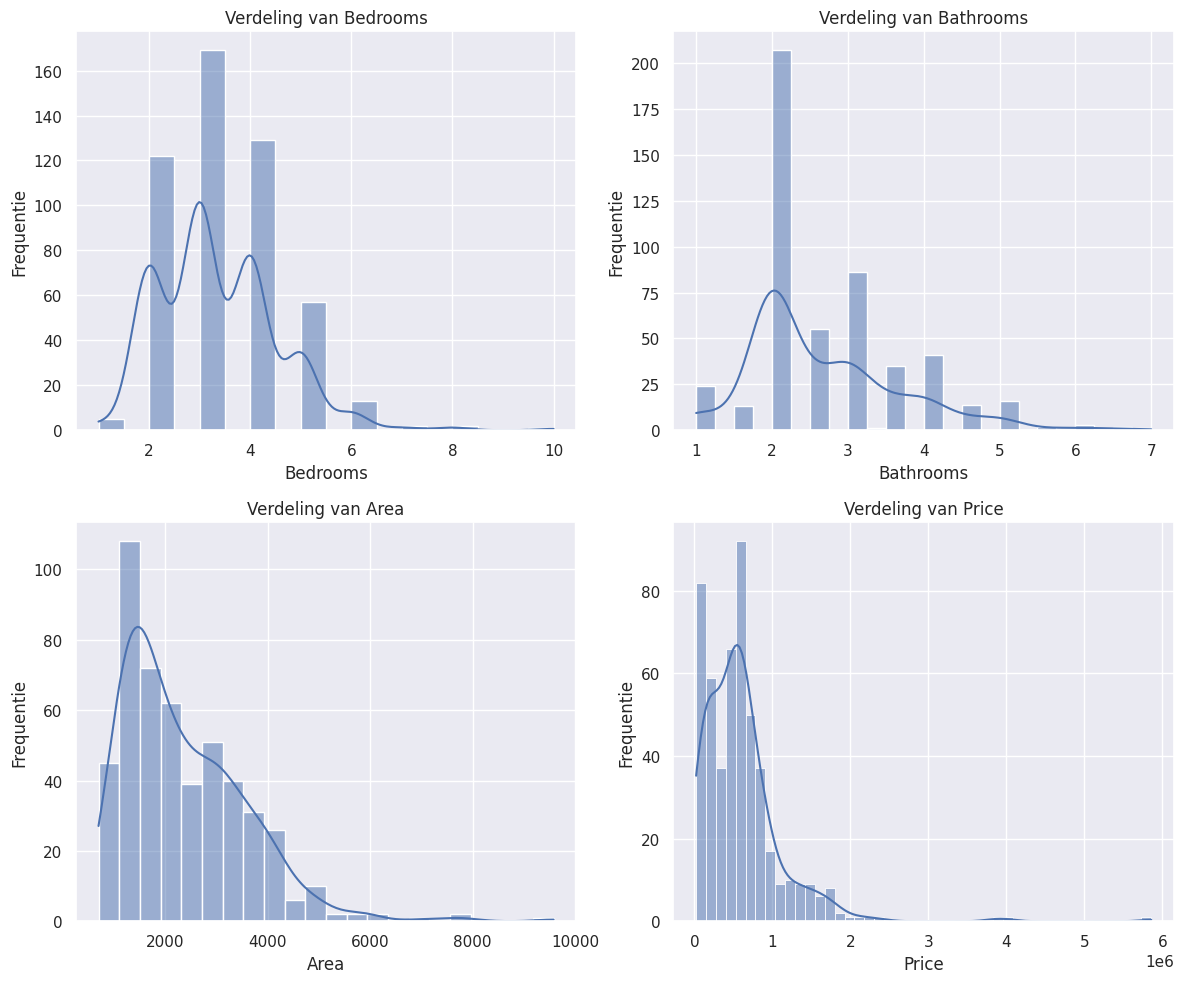

In [7]:
kolommen = ['Bedrooms', 'Bathrooms', 'Area', 'Price']

sns.set(style="darkgrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rijen, 2 kolommen

# Histogrammen plotten in het raster
ax_index = 0
for rij in range(2):
    for kolom in range(2):
        sns.histplot(train_numeriek_df[kolommen[ax_index]], kde=True, ax=axes[rij, kolom])
        axes[rij, kolom].set_title(f'Verdeling van {kolommen[ax_index]}')
        axes[rij, kolom].set_xlabel(kolommen[ax_index])
        axes[rij, kolom].set_ylabel('Frequentie')
        ax_index += 1

plt.tight_layout()  # Ruimte tussen subplots aanpassen
plt.show()

# Er zijn halve waardes bij bathrooms. Die zijn dan misschien alleen toiletten of wasbakken

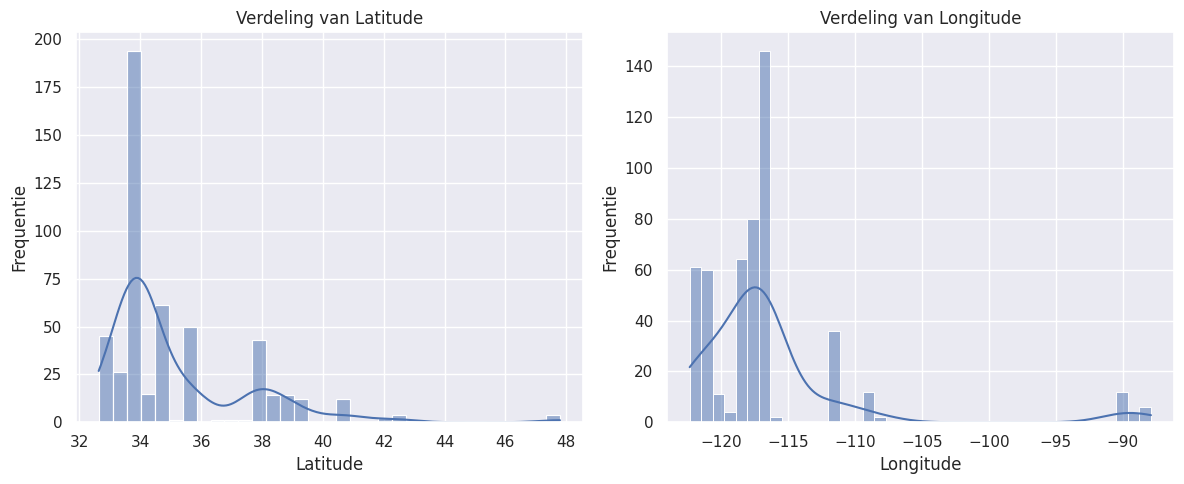

In [8]:
# Plot histogram voor longtitude en latitude
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 rij, 2 kolommen

# Histogrammen plotten in het raster
ax_index = 0
for kolom in ['Latitude', 'Longitude']:
    sns.histplot(train_numeriek_df[kolom], kde=True, ax=axes[ax_index])
    axes[ax_index].set_title(f'Verdeling van {kolom}')
    axes[ax_index].set_xlabel(kolom)
    axes[ax_index].set_ylabel('Frequentie')
    ax_index += 1

plt.tight_layout()  # Ruimte tussen subplots aanpassen
plt.show()

### Correlaties

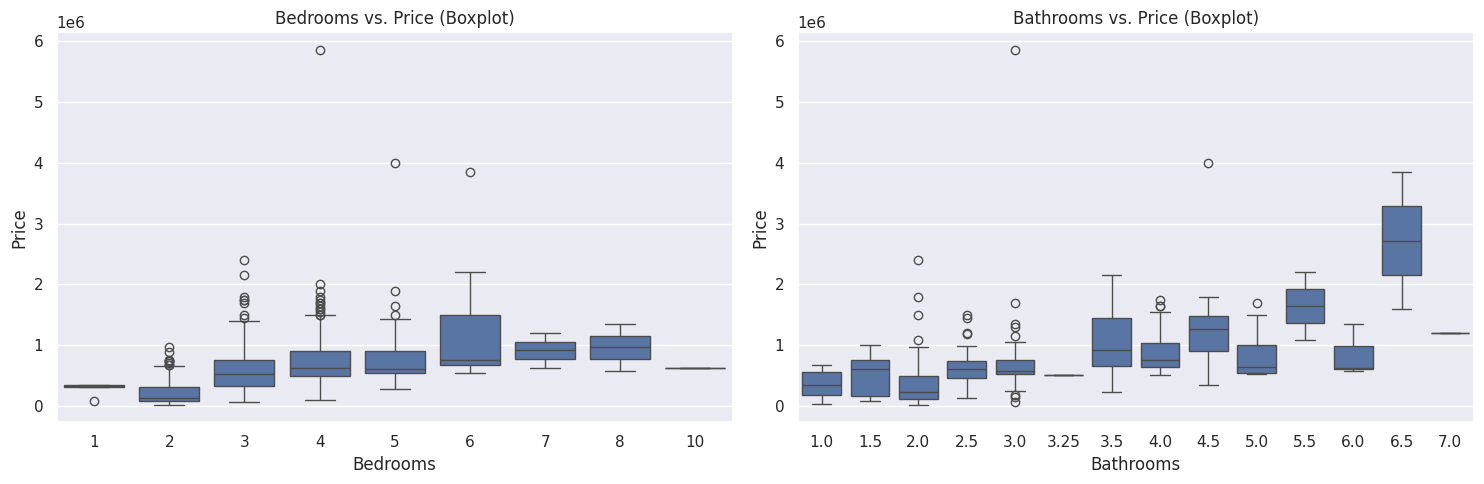

In [9]:
kolommen = ['Bedrooms', 'Bathrooms']

fig, axes = plt.subplots(1, len(kolommen), figsize=(15, 5))

# Boxplots plotten
for i, kolom in enumerate(kolommen):
    sns.boxplot(x=kolom, y='Price', data=train_numeriek_df, ax=axes[i])
    axes[i].set_title(f'{kolom} vs. Price (Boxplot)')
    axes[i].set_xlabel(kolom)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

#### Bevindingen

**Bedrooms**: Er zit geen sterke lineare verband in deze grafiek. Het blijkt dat huizen met slaapkamers van 1 tot 6 wel een lineare correlatie hebben, maar na 6 slaapkamers verschillen de prijzen niet meer.  
**Bathrooms**: Er blijkt geen lineare verband te zijn in deze grafiek. Maar er is wel te zien dat "halve" badkamers een hogere prijs hebben vergeleken met alleen complete badkamers.  

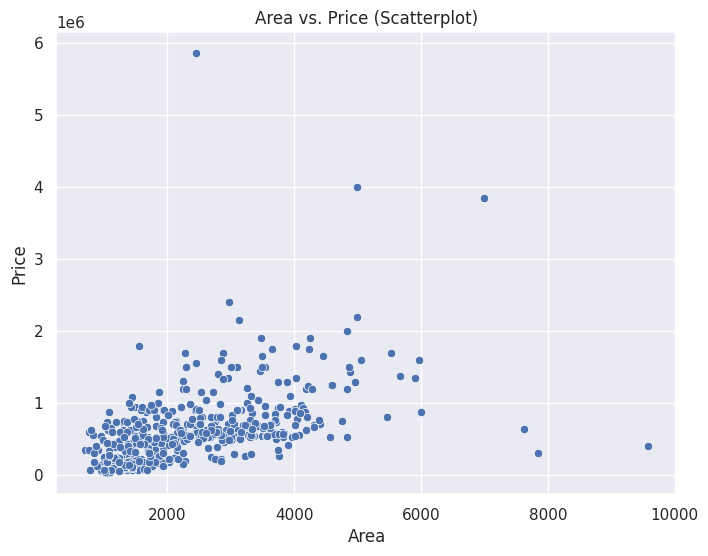

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Price', data=train_numeriek_df)
plt.title('Area vs. Price (Scatterplot)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

**Area**: In deze grafiek is er wel een relatief linear verband. Het blijkt dat huizen met een grotere oppervlakte wel duurder zijn.

### Conclusie  
Over het algemeen lijkt woonoppervlakte de sterkste invloed te hebben op de huisprijs, terwijl het effect van slaapkamers en badkamers niet zo duidelijk is.

### Visualiseren

## Feature Engineering

In [ ]:
image_paths = tf.io.gfile.glob('/content/drive/MyDrive/Colab Notebooks/Portfolio 1 Datasets/Train/*/*.jpg')
# Vervang het pad met de locatie van je images

images = []
for path in image_paths:
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image)
  images.append(image)

### Data Preparation

In [ ]:
# Removing House ID, Longtitude and Altitude
train_numeriek_df_clean = train_numeriek_df.drop(['House ID', 'Longitude', 'Latitude'], axis=1)
test_numeriek_df_clean = test_numeriek_df.drop(['House ID', 'Longitude', 'Latitude'], axis=1)

#### Normalize

In [ ]:
# Normaliseer de hele dataset met MinMaxScaler
scaler = MinMaxScaler()
train_numeriek_df_clean = pd.DataFrame(scaler.fit_transform(train_numeriek_df_clean), columns=train_numeriek_df_clean.columns)
display(train_numeriek_df_clean)



,Bedrooms,Bathrooms,Area,Price
0,0.333333,0.500000,0.377392,0.145219
1,0.333333,0.333333,0.297456,0.144483
2,0.222222,0.500000,0.362756,0.148561
3,0.444444,0.666667,0.373902,0.152159
4,0.222222,0.500000,0.384485,0.162650
...,...,...,...,...
495,0.111111,0.166667,0.062599,0.061343
496,0.333333,0.166667,0.154357,0.069894
497,0.111111,0.166667,0.170232,0.096470
498,0.222222,0.250000,0.089957,0.050891


### Analysis

## Modeling

In [ ]:
X = train_numeriek_df_clean.drop('Price', axis=1)
y = train_numeriek_df_clean['Price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(train_numeriek_df_clean.shape[1]-1,)), # Input layer met 64 neuronen en ReLU activatie. -1 omdat price niet meegenomen moet worden.
    layers.Dense(32, activation='relu'), # Hidden layer met 32 neuronen en ReLU activatie.
    layers.Dense(1) # Output layer met 1 neuron voor de prijsvoorspelling.
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate
test_loss, test_mae = model.evaluate(X_val, y_val)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0468 - mae: 0.1531 - val_loss: 0.0037 - val_mae: 0.0471
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mae: 0.0564 - val_loss: 0.0045 - val_mae: 0.0576
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mae: 0.0543 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mae: 0.0462 - val_loss: 0.0032 - val_mae: 0.0461
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mae: 0.0505 - val_loss: 0.0031 - val_mae: 0.0450
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mae: 0.0469 - val_loss: 0.0030 - val_mae: 0.0440
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mae: 0.0475 - val_loss: 0.0030 - val_mae: 0.0448
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mae: 0.0473 - val_loss: 0.0029 - val_mae: 0.0442
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.00

In [ ]:
# Bereken de MAPE
y_pred = model.predict(X_val)
mape = mean_absolute_percentage_error(y_val, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Mean Absolute Percentage Error (MAPE): 207.54%


### Fully-connected neuraal netwerk

### Convolutioneel neuraal netwerk from scratch

### Transfer learning

### Multimodaal mode

## Results

### Overview

### Scores

## Conclusion & Advice

## Sources